# Sales Analysis

Importing Libs

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Merging data files

In [10]:
complete_df = pd.DataFrame()
for file in os.listdir("./Sales_Data"):
    df = pd.read_csv("./Sales_Data/" + file)
    complete_df = pd.concat([complete_df, df])
complete_df.to_csv('Complete_df.csv', index=False)

In [71]:
df = complete_df
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data

In [72]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [73]:
df = df.dropna()
df.isna().sum()
df["Order Time"] = df["Order Date"].apply(lambda x: x[-5:])
df["Order Date"] = df["Order Date"].apply(lambda x: x[:-6])
df = df.drop(labels=df[df["Order Date"] == 'Orde'].index, axis=0)
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y")
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%H:%M').dt.time

<ipython-input-73-140ec76d5423>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Time"] = df["Order Date"].apply(lambda x: x[-5:])
<ipython-input-73-140ec76d5423>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"] = df["Order Date"].apply(lambda x: x[:-6])


In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30:00
3,176560,Google Phone,1,600,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27:00


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  object        
 3   Price Each        182735 non-null  object        
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
 6   Order Time        182735 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.2+ MB


In [88]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
 6   Order Time        182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.2+ MB


## What was the best month for sales and how what were the earnings for that month?

In [89]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [90]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46:00,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30:00,99.99
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27:00,11.99


In [95]:
res = df.groupby(by=df['Order Date'].apply(lambda x: x.month)).sum()
res

,Quantity Ordered,Price Each,Sales
Order Date,,,
1,10670,1.776156e+06,1.786511e+06
2,13162,2.145209e+06,2.158127e+06
3,16697,2.740393e+06,2.755969e+06
4,20226,3.313522e+06,3.336376e+06
5,18344,3.084756e+06,3.101881e+06
6,14964,2.508863e+06,2.524465e+06
7,15781,2.572765e+06,2.587445e+06
8,13185,2.178184e+06,2.191698e+06
9,12827,2.038020e+06,2.050361e+06


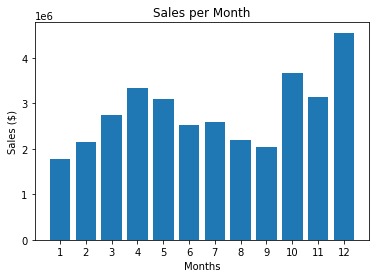

In [99]:
plt.bar(range(1,13), res['Sales'])
plt.title("Sales per Month")
plt.xticks(range(1,13))
plt.ylabel('Sales ($)')
plt.xlabel('Months')
plt.show()

Do people spend more in December beacuse of Holidays? Christmas and New Year gifts?

Was their more advertising near April?

## What city had the highest and lowest number of Sales?

To add a city column...
How about we split the purchase address in apply with lambda... yeah that makes sense.

In [102]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46:00,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30:00,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27:00,11.99,Los Angeles


In [104]:
res = df.groupby(df['City']).sum()
res

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16304,2.726247e+06,2.741642e+06
Austin,10933,1.777232e+06,1.786746e+06
Boston,22123,3.580075e+06,3.604081e+06
Dallas,16453,2.702619e+06,2.717794e+06
Los Angeles,32722,5.323916e+06,5.354040e+06
New York City,27470,4.553287e+06,4.581659e+06
Portland,13806,2.264580e+06,2.276649e+06
San Francisco,49363,8.074046e+06,8.124121e+06
Seattle,16281,2.678871e+06,2.693049e+06


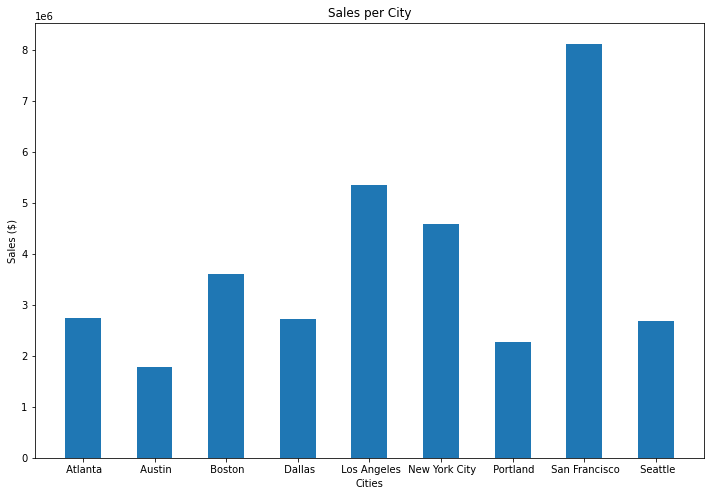

In [126]:
plt.figure(figsize=(12, 8))
plt.bar(res.index, res['Sales'], width=0.5)
plt.title("Sales per City")
plt.ylabel('Sales ($)')
plt.xlabel('Cities')
plt.show()

## What time should we display advertiesments to maximize the likelihood of customer's buying product?

In [145]:
df['Month'] = df['Order Date'].apply(lambda x: x.month)
df['Weekday'] = df['Order Date'].apply(lambda x: x.weekday())
df['Hour'] = df['Order Time'].apply(lambda x: x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Sales,City,Month,Weekday,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46:00,23.90,Dallas,4,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30:00,99.99,Boston,4,6,22
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,600.00,Los Angeles,4,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,11.99,Los Angeles,4,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27:00,11.99,Los Angeles,4,1,9


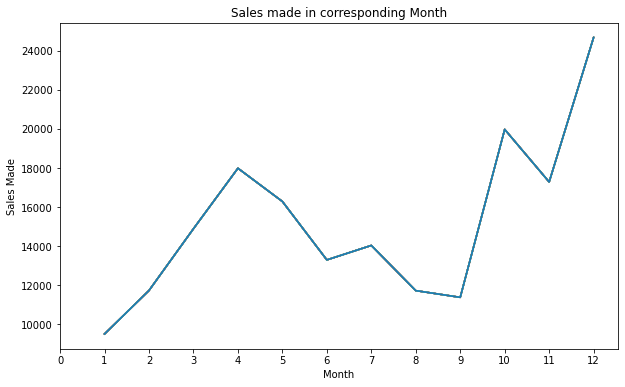

In [192]:
months = [month for month, data in df.groupby('Month')]

plt.figure(figsize=(10,6))
plt.plot(months, df.groupby('Month').count())
plt.title('Sales made in corresponding Month')
plt.xlabel('Month')
plt.ylabel('Sales Made')
plt.xticks(range(13))
plt.show()

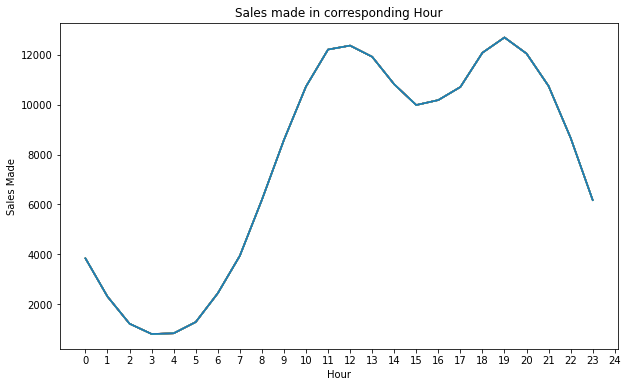

In [155]:
hours = [hour for hour, data in df.groupby('Hour')]

plt.figure(figsize=(10,6))
plt.plot(hours, df.groupby('Hour').count())
plt.title('Sales made in corresponding Hour')
plt.xlabel('Hour')
plt.ylabel('Sales Made')
plt.xticks(range(25))
plt.show()

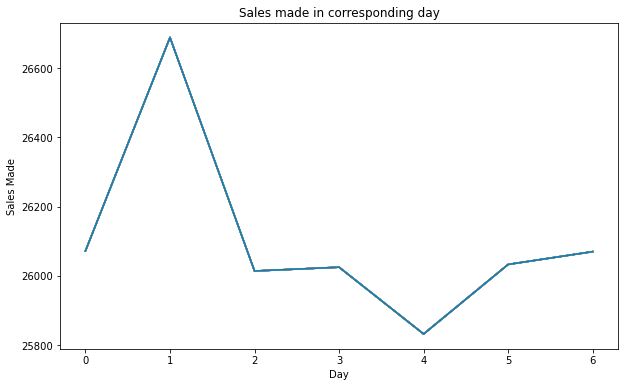

In [190]:
days = [day for day, data in df.groupby('Weekday')]

plt.figure(figsize=(10,6))
plt.plot(days, df.groupby('Weekday').count())
plt.title('Sales made in corresponding day')
plt.xlabel('Day')
plt.ylabel('Sales Made')
plt.xticks(range(7))
plt.show()

0 corresponds to Monday and 6 to Sunday

### Ads from 10AM to 8PM might yeild the best results, also the chance of sale being made on Tuesday is the highest and Friday the least.

## What are the products that are most sold together

Orders that have the same order IDs were sold together

In [159]:
dup = df[df['Order ID'].duplicated(keep=False)]
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Sales,City,Month,Weekday,Hour
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,600.00,Los Angeles,4,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,11.99,Los Angeles,4,4,14
18,176574,Google Phone,1,600.00,2019-04-03,"20 Hill St, Los Angeles, CA 90001",19:42:00,600.00,Los Angeles,4,2,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03,"20 Hill St, Los Angeles, CA 90001",19:42:00,11.95,Los Angeles,4,2,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07,"823 Highland St, Boston, MA 02215",11:31:00,99.99,Boston,4,6,11


In [162]:
dup['Group'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
d
dup.head()

<ipython-input-162-3674b74ef15d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Group'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Sales,City,Month,Weekday,Hour,Group
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,600.00,Los Angeles,4,4,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38:00,11.99,Los Angeles,4,4,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03,"20 Hill St, Los Angeles, CA 90001",19:42:00,600.00,Los Angeles,4,2,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03,"20 Hill St, Los Angeles, CA 90001",19:42:00,11.95,Los Angeles,4,2,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07,"823 Highland St, Boston, MA 02215",11:31:00,99.99,Boston,4,6,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [174]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in dup['Group']:
    row_items = row.split(',')
    count.update(Counter(combinations(row_items, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 2066),
 (('Google Phone', 'USB-C Charging Cable'), 2042),
 (('iPhone', 'Wired Headphones'), 963),
 (('Google Phone', 'Wired Headphones'), 916),
 (('iPhone', 'Apple Airpods Headphones'), 760),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 745),
 (('Google Phone', 'Bose SoundSport Headphones'), 500),
 (('USB-C Charging Cable', 'Wired Headphones'), 436),
 (('Vareebadd Phone', 'Wired Headphones'), 321),
 (('Lightning Charging Cable', 'Wired Headphones'), 250)]

## What product is sold the most?

In [182]:
products = df.groupby('Product')
res = products.sum()
res

,Quantity Ordered,Price Each,Sales,Month,Weekday,Hour
Product,,,,,,
20in Monitor,4058,443479.68,446339.42,28835,12007,57779
27in 4K Gaming Monitor,6134,2387518.78,2392198.66,43703,18227,89188
27in FHD Monitor,7429,1107826.14,1114275.71,51674,22285,105823
34in Ultrawide Monitor,6076,2301979.42,2308819.24,42521,18248,87340
AA Batteries (4-pack),27148,77621.76,104248.32,142996,60380,293174
AAA Batteries (4-pack),30487,60676.07,91156.13,144098,60261,292400
Apple Airpods Headphones,15383,2290950.00,2307450.00,107678,45608,219184
Bose SoundSport Headphones,13236,1310768.91,1323467.64,92676,39805,189216
Flatscreen TV,4724,1411500.00,1417200.00,33592,14024,67412


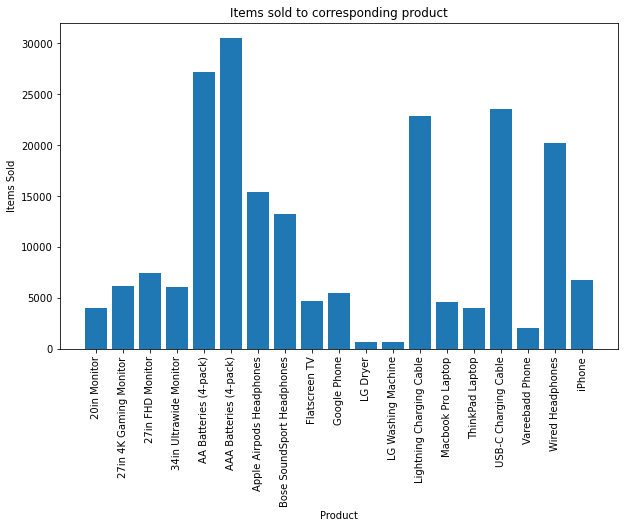

In [186]:
prod = [product for product, data in products]

plt.figure(figsize=(10,6))
plt.bar(prod, res['Quantity Ordered'])
plt.title('Items sold to corresponding product')
plt.xlabel('Product')
plt.ylabel('Items Sold')
plt.xticks(prod, rotation='vertical')
plt.show()